In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [32]:
df = pd.read_csv("D:/projects/flood&earthquake/Significant Earthquakes, 1965-2016/Significant Earthquakes, 1965-2016.csv")

In [33]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [35]:
# Creating a list with numeric columns for visualization

numeric_columns = []

for column in df.columns:
    if df.dtypes[column] !="object":
        numeric_columns.append(column) 

In [36]:
numeric_columns

['Latitude',
 'Longitude',
 'Depth',
 'Depth Error',
 'Depth Seismic Stations',
 'Magnitude',
 'Magnitude Error',
 'Magnitude Seismic Stations',
 'Azimuthal Gap',
 'Horizontal Distance',
 'Horizontal Error',
 'Root Mean Square']

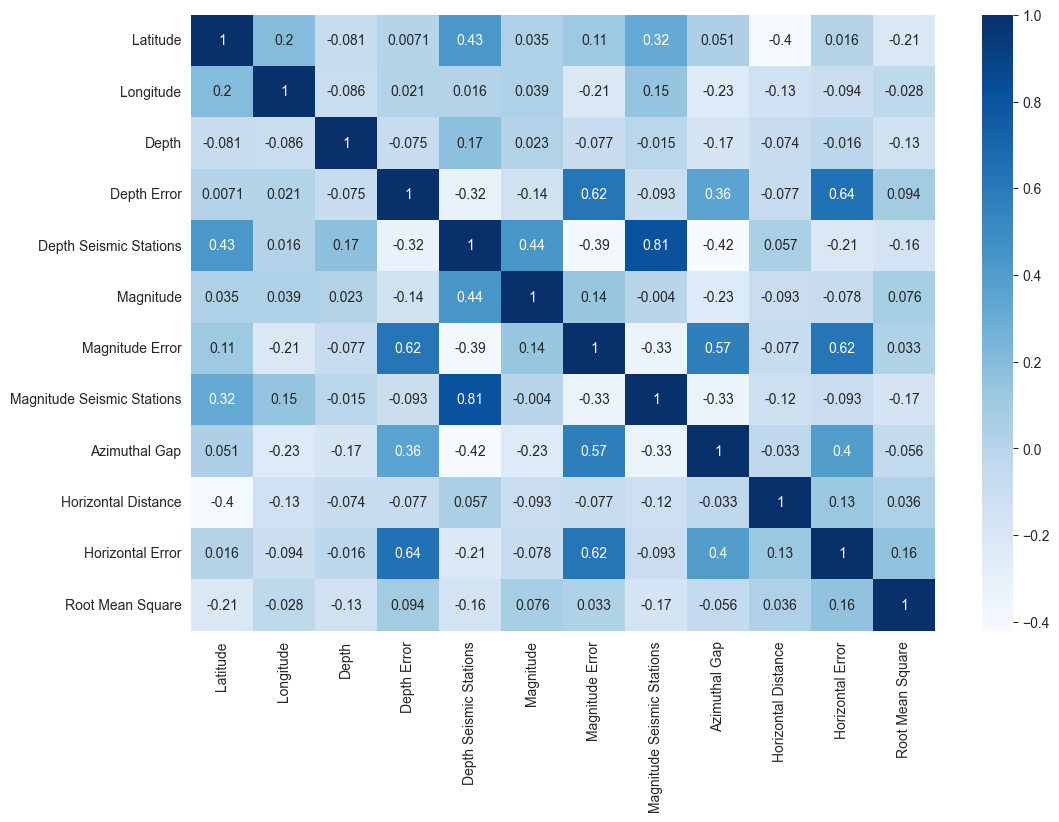

In [37]:
# Correlation matrix with heatmap

corr_mat = df[numeric_columns].corr() 
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap="Blues")
plt.show()

In [38]:
data = df.drop("ID", axis=1)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [58]:
def preprocess_inputs(df):
    
    df = df.copy()
    
    # Dropping columns with more than 30% missing values
    
    for column in data.columns:
        if df[column].isna().mean() > 0.3:
            df = df.drop(column, axis=1) 
        
    # Filling the missing values of the Root Mean Square column
    
    df["Root Mean Square"] = df["Root Mean Square"].fillna(df["Root Mean Square"].mean())
    
    # Dropping the rows with missing targat values
    
    df = df.dropna(axis=0).reset_index(drop=True)
    
    # Extracting the date features
    
    df["Month"] = df["Date"].apply(lambda x: (x[0:2])) 
    df["Year"] = df["Date"].apply(lambda x: (x[-4:]))    
    df = df.drop("Date", axis=1)
    
    # Convert Month column to integer or float
    
    df["Month"] = df["Month"].astype(int)
    
    # Dropping the rows in the Year column which have Z and converting the column to int or float
    
    invalid_indexes = df[df["Year"].str.contains("Z")].index
    df = df.drop(invalid_indexes, axis=0).reset_index(drop=True)
    
    df["Year"] = df["Year"].astype(int)
    
    # Extracting the hour feature
    
    df["Hour"] = df["Time"].apply(lambda x: int(x[0:2])) 
    
    df = df.drop("Time", axis=1)
    
    # Binary encode the Status column
    
    df["Status"] = df["Status"].replace({"Automatic": 1, "Reviewed": 0})
    
    # One-hot encoding
    
    for column in ["Type", "Magnitude Type", "Source", "Location Source", "Magnitude Source"]:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    
    # Splitting and scaling the data
    
    y = df["Status"]
    X = df.drop("Status", axis=1)
    
    # Scaling X 
    
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

    return X_train, X_test, y_train, y_test

In [59]:
X_train, X_test, y_train, y_test= preprocess_inputs(data)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_12824\1675550044.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Status"] = df["Status"].replace({"Automatic": 1, "Reviewed": 0})


In [60]:
X_train

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month,Year,Hour,Earthquake,Explosion,...,NN,OFFICIAL,PAR,PGC,PR,SE,US,US_GCMT,US_PGC,UW
8993,-0.500271,-0.923323,-0.165211,0.041170,-0.756323,-0.445292,-0.321203,0.660464,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,1.112793,-0.011322,-0.006537,-0.016013
13980,-0.779298,-1.723366,0.842872,-0.904240,-0.263486,-0.445292,0.371976,-0.210227,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
1005,0.860293,0.169884,-0.027374,0.041170,0.000083,0.423153,-1.707562,0.225119,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
20683,1.168710,0.824899,-0.495529,-0.667888,0.167746,-1.024255,1.273109,0.080004,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
15094,0.178267,-0.936095,-0.438437,1.459287,-0.078672,1.291598,0.510612,-0.790687,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.398583,0.589319,-0.369111,-0.667888,1.091814,-0.155810,0.094704,1.531155,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,1.112793,-0.011322,-0.006537,-0.016013
21575,-0.417446,1.001710,-0.495529,0.986581,1.769464,-1.313736,1.411745,1.531155,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,1.112793,-0.011322,-0.006537,-0.016013
5390,-0.271291,0.714778,1.127516,-0.667888,0.000083,1.581079,-0.945065,-0.065111,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,1.112793,-0.011322,-0.006537,-0.016013
860,-0.237218,0.905222,-0.332409,-0.431535,0.000083,-1.313736,-1.707562,0.225119,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013


In [61]:
X_test

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month,Year,Hour,Earthquake,Explosion,...,NN,OFFICIAL,PAR,PGC,PR,SE,US,US_GCMT,US_PGC,UW
18953,1.667252,-1.743508,-0.471061,1.695639,-0.571509,-0.734773,1.065155,-0.935802,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,1.112793,-0.011322,-0.006537,-0.016013
17917,-0.811511,-0.863318,0.360852,-0.904240,0.000083,-0.155810,0.926519,-1.371148,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,1.112793,-0.011322,-0.006537,-0.016013
3418,-0.820146,-1.711215,-0.307941,-0.667888,0.000083,-0.734773,-1.222336,-0.210227,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,1.112793,-0.011322,-0.006537,-0.016013
20798,1.691097,-1.696427,0.545177,-0.904240,-0.879532,-0.445292,1.273109,0.805580,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,1.112793,-0.011322,-0.006537,-0.016013
15053,-0.629656,-1.711725,1.802833,0.986581,-0.201882,1.002116,0.510612,-0.935802,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9902,0.329902,-1.004585,-0.079572,0.041170,1.707860,-0.734773,-0.182567,-1.080918,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
21090,-0.306360,0.853750,0.523972,2.877403,-1.495577,1.581079,1.273109,-0.935802,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,1.112793,-0.011322,-0.006537,-0.016013
6741,1.071572,0.795618,-0.475954,0.277523,-0.140277,1.002116,-0.667793,0.225119,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
13883,0.287494,0.679903,-0.113828,-0.904240,0.044537,-1.313736,0.371976,0.225119,0.088034,-0.013074,...,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013


In [62]:
y_train

8993     0
13980    0
1005     1
20683    0
15094    0
        ..
11964    0
21575    0
5390     0
860      1
15795    0
Name: Status, Length: 17554, dtype: int64

In [63]:
y_test

18953    0
17917    0
3418     0
20798    0
15053    0
        ..
9902     0
21090    0
6741     0
13883    0
5701     0
Name: Status, Length: 5852, dtype: int64

In [64]:
# Training

model = RandomForestClassifier()
model.fit(X_train, y_train)
print("RF trained.")

RF trained.


In [65]:
# Results
model.score(X_test, y_test)

1.0